# 1. 고객의 특성 이해

## 1.2. 데이터 읽기와 확인

In [2]:
import pandas as pd

bank_df = pd.read_csv('dataset/bank-prep.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
print(bank_df.shape)
print(bank_df.dtypes)

(6933, 32)
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unknown      int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


## 1.3 데이터 정규화

### 범위변환 테스트

In [4]:
from sklearn.preprocessing import MinMaxScaler

bank_df = bank_df.drop('y', axis=1)

mc = MinMaxScaler()
mc.fit(bank_df)

bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns = bank_df.columns)
bank_df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Z변환 테스트

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


### 각 변수의 평균과 표준편차 값 확인

In [6]:
print(bank_df_sc.mean())
print(bank_df_sc.std())

age         -3.085501e-16
default     -2.955983e-15
balance      8.058845e-17
housing      1.263524e-14
loan        -6.665694e-15
day         -1.745907e-15
duration     5.929837e-17
campaign     4.521945e-15
pdays        2.224701e-14
previous     1.160586e-15
divorced     1.641971e-15
married     -1.653693e-15
single      -1.133763e-15
primary     -2.040037e-15
secondary    2.141291e-15
tertiary     1.623955e-15
cellular     7.350275e-15
telephone    9.604558e-15
unknown     -3.957336e-14
apr         -3.182223e-16
aug         -7.228092e-15
dec          1.448650e-15
feb         -1.088728e-14
jan         -9.445567e-15
jul          1.463856e-14
jun         -6.843317e-15
mar         -2.591381e-15
may          9.057037e-15
nov          6.118989e-15
oct         -1.769291e-14
sep         -6.114746e-15
dtype: float64
age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pda

# 2. 고객의 그룹화

### 2.1 계층형 클러스터링

계층형 클러스터링(Hierarchical Clustering은 거리가 가까운 데이터부터 순서대로 병합해 그룹을 형성한다. 그룹화의 결과는 덴드로그램(Dendrogram)으로 표현<br>
계층형 클러스터링에서는 형성하는 그룹의 개수를 미리 정해놓을 필요 없음. 거리에 경걔값을 설정하고 그룹을 만들수 있음

#### 계층형 클러스터링을 이용한 그룹 분할

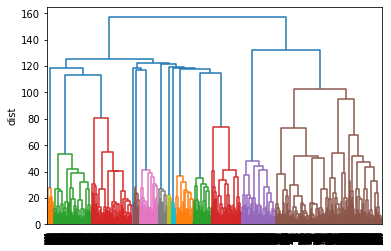

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

hcls = linkage(bank_df_sc, metric = 'euclidean', method='ward')
dendrogram(hcls)

plt.ylabel('dist')
plt.show()

#### 고객별 그룹 확인

In [10]:
from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 100, criterion = 'distance')
print(cst_group)

[14 14 14 ... 12 12 12]


### 2.2 비계층형 클러스터링

비계층형 클러스터링의 방법으로 는 K-Means법이 유명합니다. K-Means법에서는 데이터의 덩어리를 성질이 비슷한 k개의 덩어리로 분할해 그룹을 형성한다.

In [11]:
from sklearn.cluster import KMeans

kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(bank_df_sc)

print(cst_group)

[1 1 1 ... 0 0 0]


#### 클러스터 ID별 데이터 분포 확인

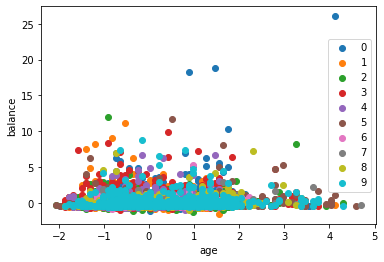

In [12]:
for i in range(10):
    labels = bank_df_sc[cst_group == i]
    plt.scatter(labels['age'], labels['balance'], label=i)
    
plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

#### 클러스터ID별 데이터 세트와의 결합

In [13]:
bank_df_sc['group'] = cst_group
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1


#### 그룹별 데이터 건수 확인

In [14]:
print(bank_df_sc['group'].value_counts())

3    1321
1    1241
2    1096
9     916
4     752
0     647
8     464
5     238
6     189
7      69
Name: group, dtype: int64


#### 각 그룹의 통계량 계산 및 성질 파악

In [16]:
bank_df_sc[bank_df_sc['group']==0].describe()
# 클러스터 ID=0에 대한 통계요약

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,...,6.470000e+02,6.470000e+02,647.000000,6.470000e+02,6.470000e+02,6.470000e+02,647.000000,6.470000e+02,6.470000e+02,647.0
mean,0.153239,0.012111,0.483123,-0.008797,0.055130,0.333198,-0.025554,-0.246153,0.011105,0.126770,...,-2.678184e-01,-1.674064e-01,-0.430502,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.111671,-1.349488e-01,-1.120725e-01,0.0
std,0.928869,1.043158,1.891530,1.001896,1.047934,0.436705,0.984736,0.471360,0.745753,1.186953,...,4.444328e-16,1.166636e-15,0.107524,4.999869e-15,1.166636e-15,5.666518e-15,0.191254,9.721967e-16,5.416525e-16,0.0
min,-1.964393,-0.137148,-1.063086,-1.140627,-0.444540,-1.758049,-0.957063,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,-0.320275,-1.349488e-01,-1.120725e-01,0.0
25%,-0.633545,-0.137148,-0.349280,-1.140627,-0.444540,0.293287,-0.614155,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
50%,0.031879,-0.137148,-0.068914,0.876711,-0.444540,0.413954,-0.353247,-0.238367,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
75%,0.887424,-0.137148,0.670513,0.876711,-0.444540,0.534620,0.235659,-0.238367,0.535421,0.232436,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
max,4.119482,7.291369,26.055019,0.876711,2.249514,1.741289,7.160898,2.448242,5.165246,19.765504,...,-2.678184e-01,-1.674064e-01,2.300280,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0


# 3. 잠재적인 요구 추출

## 3.1 주성분 분석이란?

### PCA를 이용한 신규변수 작성

In [19]:
from sklearn.decomposition import PCA

pca = PCA(0.80) # 누적 기여율이 80%에 도달할 때까지의 주성분을 추출하는 인스턴스 생성
bank_df_pca = pca.fit_transform(bank_df_sc)

print(pca.n_components_)
print(bank_df_pca.shape)

17
(6933, 17)


### 목적변수별 분포 확인

In [23]:
y = pd.read_csv('bank-prep.csv', sep=',')['y']

bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y

print(bank_df_pca.shape)

(6933, 18)


### 목적함수별 산포도 확인

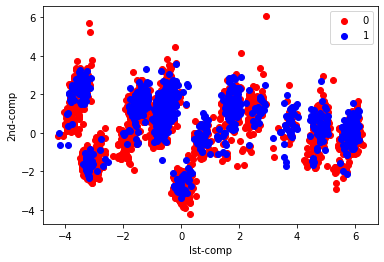

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y', axis=1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0)

bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis=1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1)

plt.legend()
plt.xlabel('lst-comp')
plt.ylabel('2nd-comp')
plt.show()
